In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Método de selección de características

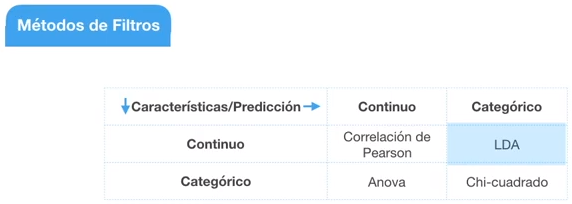
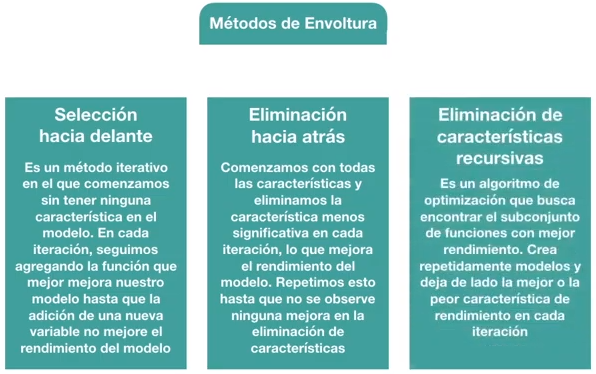
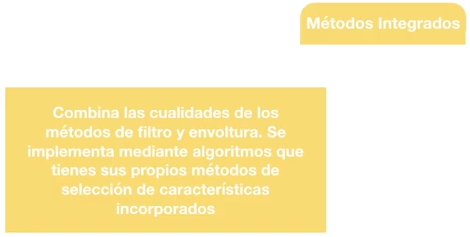

# REGRESION POLINOMIAL

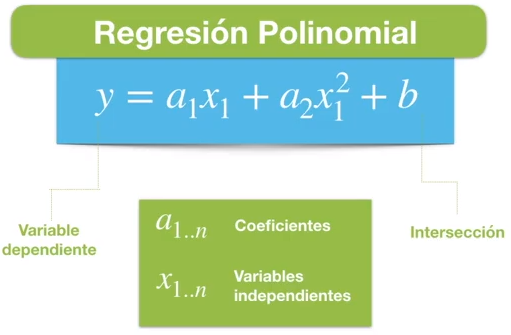
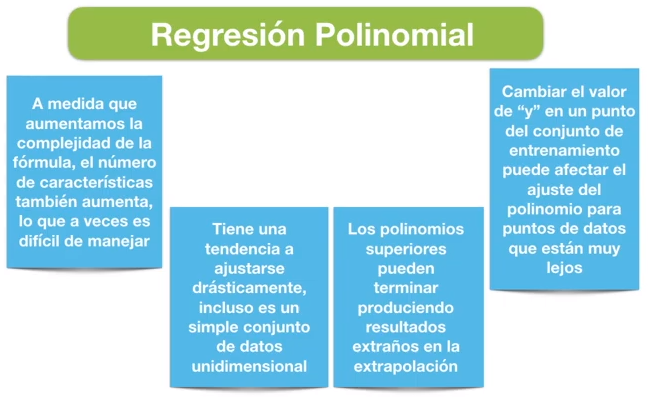

# SCIKIT LEARN
## 1.- Exploración de datos

In [2]:
boston = load_boston()

c:\Users\alk10\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
# Información en el dataset
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
# Características del dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Cantidad de datos que hay en el dataset
boston.data.shape

(506, 13)

In [6]:
# Información de las columnas
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Transformar a DataFrame
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 2.- Creación del modelo

In [22]:
# Parametros para modelo: RM
X = boston.data[:, np.newaxis, 5]
y = boston.target

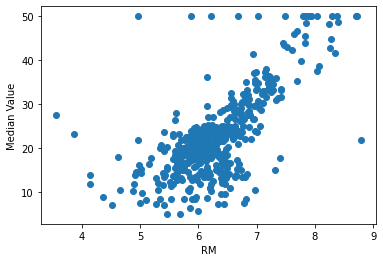

In [23]:
# Grafica
plt.scatter(X, y)
plt.xlabel('RM')
plt.ylabel('Median Value')
plt.show()

In [24]:
# Separar los datos para train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
# Seleccionar grado del polinomio
reg = PolynomialFeatures(degree=2)  # Cambiar para ajustar el modelo

In [26]:
# Transformar las características existentes en características de mayor grado
X_train_p = reg.fit_transform(X_train)
X_test_p = reg.fit_transform(X_test)

In [27]:
# Crear modelo
pr = LinearRegression()
pr.fit(X_train_p, y_train)

# Predicción
y_pred = pr.predict(X_test_p)

## 3.- Datos del modelo

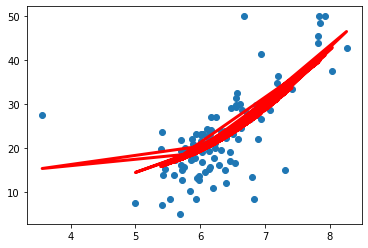

In [28]:
# Grafica
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.show()

In [30]:
# Valor de la pendiente o coeficiente 'a'
print(pr.coef_)

[  0.         -19.71145928   2.22912894]


In [31]:
# Valor de la intersección o coeficiente 'b'
print(pr.intercept_)

57.26496827832058


In [32]:
# Precisión del algoritmo
print(pr.score(X_train_p, y_train))

0.5393137764628951


El valor de Score va de 0 a 1, por lo que podemos decir que la precisión del modelo no es muy buena ya que el modelo se adapta al 53,9% de los datos.